In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import gym
import base
from src.agents import DeepQAgent
from src.util import JupyterCallback

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Environment

In [3]:
env = gym.make('BreakoutNoFrameskip-v4')

In [4]:
env.observation_space

Box(210, 160, 3)

In [5]:
env.action_space

Discrete(4)

# Agent

In [6]:
agent = DeepQAgent(env, frames_per_action=4, replay_size=250000)
agent

/home/bitcommander/Documents/Projects/deep-learning-project/src/models/deep_mind_model.py:61: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("mu..., inputs=[<tf.Tenso...)`
  model = Model(input=[cnn_input, mask_input], output=output)


DeepQAgent(
    env=<TimeLimit<AtariEnv<BreakoutNoFrameskip-v4>>>,
    loss=<function huber_loss at 0x7f6c0938f620>,
    optimizer=<keras.optimizers.RMSprop object at 0x7f6c7406be10>,
    discount_factor=0.99,
    exploration_rate=1.0,
    exploration_decay=0.9999975,
    exploration_min=0.1,
    image_size=(84, 84),
    frames_per_action=4,
    update_frequency=4
    replay_size=250000
)

In [7]:
res_random = agent.play()
res_random

100%|██████████| 30/30 [00:19<00:00,  1.53game/s]


array([ 2.,  2., -1.,  0.,  0., -1.,  0., -1., -1., -1., -1., -1., -1.,
        0.,  1.,  0., -1., -1., -1.,  1.,  0.,  3.,  1.,  1.,  1.,  1.,
       -1.,  0., -1., -1.])

In [8]:
res_random.mean()

-0.03333333333333333

In [9]:
agent.observe(50000)

100%|██████████| 50000/50000 [03:18<00:00, 252.00frame/s]


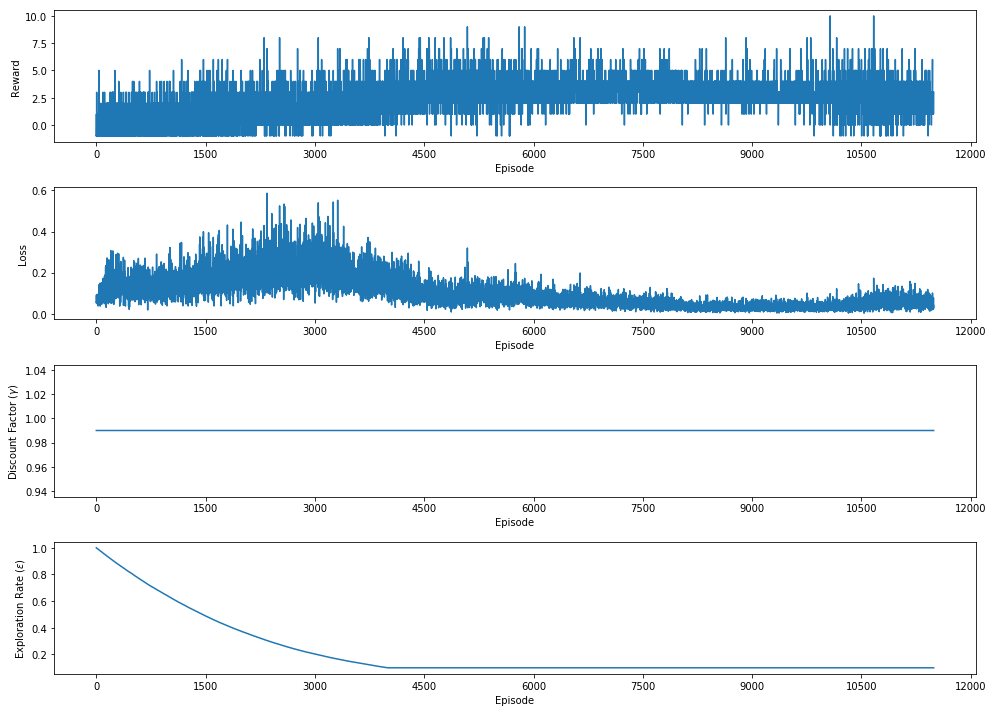

 77%|███████▋  | 11492/15000 [12:10:14<3:42:54,  3.81s/episode]

KeyboardInterrupt: 

In [10]:
agent.train(episodes=15000, callback=JupyterCallback())

In [11]:
res_trained = agent.play()
res_trained


  3%|▎         | 1/30 [00:01<00:53,  1.84s/game]
Exception in thread Thread-6:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/usr/local/lib/python3.5/dist-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/usr/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

100%|██████████| 30/30 [01:06<00:00,  2.21s/game]


array([4., 4., 4., 3., 2., 4., 4., 4., 4., 4., 4., 5., 4., 4., 3., 4., 4.,
       4., 4., 4., 3., 4., 4., 4., 4., 4., 3., 4., 4., 3.])

In [12]:
res_trained.mean()

3.8

In [13]:
agent.save_model()